In [2]:
clear all;
close all;

contrast_of_interest = 'P_simple_STIM_cue_high_gt_low';

In [3]:
mount_dir = '/Volumes/spacetop_projects_cue/analysis/fmri/spm/univariate/model01_6cond_highlowcue_rampplateau/1stlevel';
contrast_name = {
    'P_VC_STIM_cue_high_gt_low', 'V_PC_STIM_cue_high_gt_low', 'C_PV_STIM_cue_high_gt_low',...% contratss
    'P_VC_STIM_stimlin_high_gt_low', 'V_PC_STIM_stimlin_high_gt_low', 'C_PV_STIM_stimlin_high_gt_low',...
    'P_VC_STIM_stimquad_med_gt_other', 'V_PC_STIM_stimquad_med_gt_other', 'C_PV_STIM_stimquad_med_gt_other',...
    'P_VC_STIM_cue_int_stimlin','V_PC_STIM_cue_int_stimlin', 'C_PV_STIM_cue_int_stimlin',...
    'P_VC_STIM_cue_int_stimquad','V_PC_STIM_cue_int_stimquad','C_PV_STIM_cue_int_stimquad',...
    'motor',... %motor
    'P_simple_STIM_cue_high_gt_low','V_simple_STIM_cue_high_gt_low', 'C_simple_STIM_cue_high_gt_low',... % dummay contrasts
    'P_simple_STIM_stimlin_high_gt_low',  'V_simple_STIM_stimlin_high_gt_low', 'C_simple_STIM_stimlin_high_gt_low',...
    'P_simple_STIM_stimquad_med_gt_other','V_simple_STIM_stimquad_med_gt_other', 'C_simple_STIM_stimquad_med_gt_other',...
    'P_simple_STIM_cue_int_stimlin',      'V_simple_STIM_cue_int_stimlin', 'C_simple_STIM_cue_int_stimlin',...
    'P_simple_STIM_cue_int_stimquad',     'V_simple_STIM_cue_int_stimquad','C_simple_STIM_cue_int_stimquad',...
    'P_simple_STIM_highcue_highstim',     'P_simple_STIM_highcue_medstim', 'P_simple_STIM_highcue_lowstim',... % pain events
    'P_simple_STIM_lowcue_highstim',      'P_simple_STIM_lowcue_medstim', 'P_simple_STIM_lowcue_lowstim',...
    'V_simple_STIM_highcue_highstim',     'V_simple_STIM_highcue_medstim', 'V_simple_STIM_highcue_lowstim',... % vicarious events
    'V_simple_STIM_lowcue_highstim',      'V_simple_STIM_lowcue_medstim', 'V_simple_STIM_lowcue_lowstim',...
    'C_simple_STIM_highcue_highstim',    'C_simple_STIM_highcue_medstim', 'C_simple_STIM_highcue_lowstim',... % cognitive events
    'C_simple_STIM_lowcue_highstim',    'C_simple_STIM_lowcue_medstim', 'C_simple_STIM_lowcue_lowstim',...
    'P_VC_CUE_cue_high_gt_low','V_PC_CUE_cue_high_gt_low','C_PV_CUE_cue_high_gt_low',...% cue epoch contrasts
    'P_simple_CUE_cue_high_gt_low','V_simple_CUE_STIM_cue_high_gt_low','C_simple_CUE_cue_high_gt_low',...% cue epoch dummy
    'G_simple_CUE_cue_high_gt_low',...
    'P_VC_STIM', 'V_PC_STIM', 'C_PV_STIM'
};
index = find(strcmp(contrast_name, contrast_of_interest));
con_name = sprintf('*con_%04d.nii', index);
con_list = dir(fullfile(mount_dir, '*', con_name));
spm('Defaults','fMRI') 
con_fldr = {con_list.folder}; fname = {con_list.name};
con_files = strcat(con_fldr,'/', fname)';
con_data_obj = fmri_data(con_files);

Using default mask: /Users/h/Documents/MATLAB/CanlabCore/CanlabCore/canlab_canonical_brains/Canonical_brains_surfaces/brainmask_canlab.nii
Direct calls to spm_defauts are deprecated.
Please use spm('Defaults',modality) or spm_get_defaults instead.
loading mask. mapping volumes. 
checking that dimensions and voxel sizes of volumes are the same. 
Pre-allocating data array. Needed: 28753056 bytes
Loading image number:                                            1   1   1   1   1   1   1   1   1   1   2   2   2   2   2   2   2   2   2   2   3   3   3   3   3   3   3   3   3   3   4   4   4   4   4   4   4   4   4   4   5   5   5   5   5   5   5   5   5   5   6   6   6   6   6   6   6   6   6   6   7   7   72
Elapsed time is 5.537004 seconds.
Image names entered, but fullpath attribute is empty. Getting path info.
Number of unique values in dataset: 6899522  Bit rate: 22.72 bits


#### check data coverage

Compressed NIfTI files are not supported.

SPM12: spm_check_registration (v7759)              13:51:34 - 30/01/2024
Display /Users/h/Documents/MATLAB/CanlabCore/CanlabCore/canlab_canonical_brains/Canonical_brains_surfaces/fmriprep20_template.nii.gz,1
Grouping contiguous voxels:   1 regions


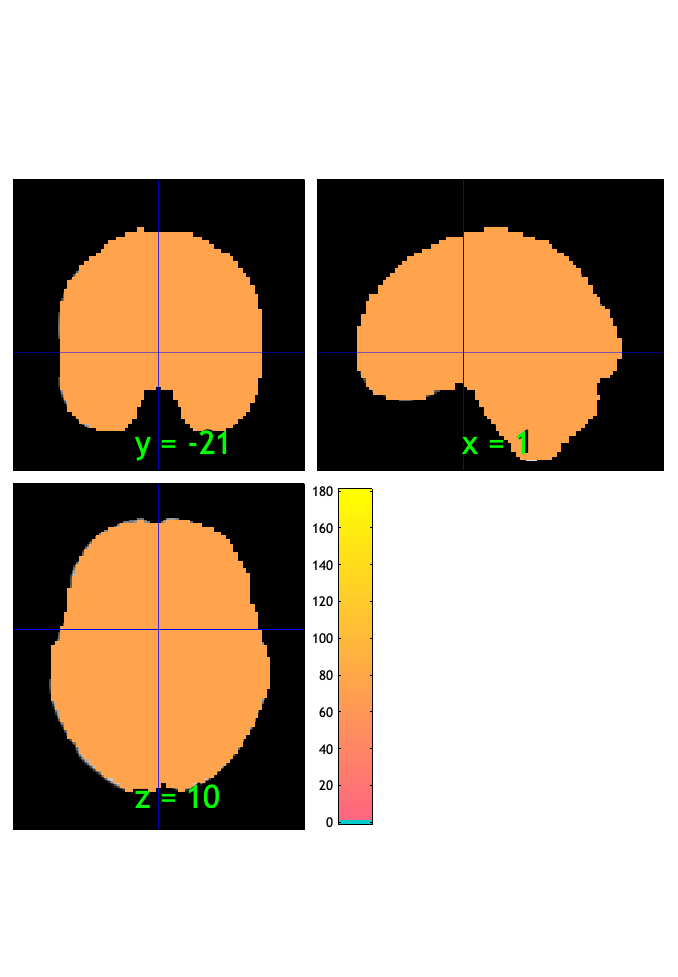

In [4]:
m = mean(con_data_obj);
m.dat = sum(~isnan(con_data_obj.dat) & con_data_obj.dat ~= 0, 2);
orthviews(m, 'trans'); % display

In [1]:
drawnow; snapnow

[wh_outlier_uncorr, wh_outlier_corr] = plot(con_data_obj);

% remove outlier
con = con_data_obj;
disp(strcat("current length is ", num2str(size(con_data_obj.dat,2))));

Error using eval
Unrecognized function or variable 'con_data_obj'.



In [ ]:
con.dat = con_data_obj.dat(:,~wh_outlier_corr);
con.image_names = con_data_obj.image_names(~wh_outlier_corr,:);
con.fullpath = con_data_obj.fullpath(~wh_outlier_corr,:);
con.files_exist = con_data_obj.files_exist(~wh_outlier_corr,:);
%end
disp(strcat("after removing ", num2str(sum(wh_outlier_corr)), " participants, size is now ",num2str(size(con.dat,2))));

the MATLAB function has been cancelled


In [ ]:
[path,n,e] = fileparts(con_fldr(wh_outlier_corr));
disp(strcat("participants that are outliers:... ", n));

# load behavioral data

In [ ]:
main_dir = '/Users/h/Documents/projects_local/cue_expectancy';
save_dir = fullfile(main_dir, 'analysis', 'fmri', 'spm', 'scaling','6conditions_highlowcue_rampplateau'); 
beh_cueeffect = readtable('/Users/h/Documents/projects_local/cue_expectancy/data/hlm/cue_stim_effects_scaling.csv');
pain_task = find(strcmp(beh_cueeffect.task, 'pain'));

pain_cueeffect = beh_cueeffect(pain_task, :);

% extract subject ids from contrast fMRI data object and intersect with
% behavioral data
nRows = size(con_data_obj.image_names, 1);
sub_ids = cell(nRows, 1);

for i = 1:nRows
    sub_ids{i} = con_data_obj.image_names(i, 1:8);
end

sub_ids_table = table(sub_ids, 'VariableNames', {'sub'});
common_subs = intersect(sub_ids_table.sub, pain_cueeffect.sub)
% Ensure beh_cueeffect.sub is a cell array for comparison
if ~iscell(pain_cueeffect.sub)
    pain_cueeffect.sub = cellstr(pain_cueeffect.sub);
end

rows_to_keep = ismember(pain_cueeffect.sub, common_subs);
filtered_pain_cueeffect = pain_cueeffect(rows_to_keep, :);

% regenerate contrast filenames based on intersecting subject ids
% Initialize an empty cell array for the file paths
filteredcon_files = cell(length(common_subs), 1);

% Loop through each subject ID and construct the file path
for i = 1:length(common_subs)
    filteredcon_files{i} = fullfile(mount_dir, common_subs{i}, [common_subs{i}, '_', sprintf('con_%04d.nii', index)]);
end

# center all covariates

In [ ]:
beh_filtered  = filtered_pain_cueeffect;
% Assuming 'T' is your MATLAB table
for k = 3:width(beh_filtered)  % Start loop from the 3rd column
    % Check if the column is numeric
    if isnumeric(beh_filtered.(k))
        % Center the column
        beh_filtered.(k) = beh_filtered.(k) - mean(beh_filtered.(k));

        % Rename the column by appending '_center'
        beh_filtered.Properties.VariableNames{k} = [beh_filtered.Properties.VariableNames{k} '_center'];
    end
end

In [ ]:
Step 03. run multiple regression with covariates